# Imports

In [5]:
#import the necessary libraries for inital data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Read

In [6]:
#reading the data file in a dataframe, adding low_memory=False to remove warning while reading the data
df = pd.read_csv("loan.csv",low_memory=False)

# Data understanding

In [7]:
# Just by eyeballing the data we can notice some huge data quality issues like
# Many columns invalid values like NA
# some columns contains redundant values like 0,1,INDIVIDUAL,n or more
# some columns have many missing values like columns "next_pymnt_d"
# some columns have Empty values also 

In [8]:
# Duplication Check
df1 = df.drop(["id","member_id"],axis=1)
len(df1.drop_duplicates())
# we found out that there are no duplicate rows in the updated dataframe after removing the unqiue id's from the data

39717

# Data Cleaning

In [9]:
#check shape of your dataframe i.e. how many rows and columns we have in total
df.shape

(39717, 111)

In [10]:
# Filter out unncessary columns that do not pertain with our use case

In [11]:
df = df.drop(['collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type',
               'annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt',
               'tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
               'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim',
               'inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy',
               'bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op',
               'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq',
               'mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl',
               'num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts',
               'num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',
               'num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens',
               'tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','next_pymnt_d',
              'last_credit_pull_d','initial_list_status','mths_since_last_delinq','mths_since_last_record','desc',
              'pymnt_plan','url'],axis=1)

In [12]:
# some highlight from above cell, we are removing desc column bcoz of 15k approx missing data

In [13]:
#check shape of your dataframe i.e. how many rows and columns we have in total
df.shape

(39717, 41)

In [14]:
# Even after removing many unwanted columns we can notice we still have 41 column, so lets remove some more unrelated or 
# duplicate columns form the dataframe columns 

In [15]:
df = df.drop(['id','funded_amnt_inv','issue_d','earliest_cr_line','revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'],axis=1)

In [16]:
# we can remove "id" as we have another unique column(member_id), both columns signify same things even though values are different
# we can remove 'funded_amnt_inv' as we are only interested in the loan approved by the LC
# we can remove "issue_d" , "out_prncp", "out_prncp_inv" and "earliest_cr_line" since we can track the loan status from "loan_status" column
# we can remove "revol_bal". Instead we can use "revol_util" which gives value in percentage of the credit used
# we can remove "total_pymnt" and "total_pymnt_inv" as we can track loan status from 'loan_status' column
# we can remove 'total_rec_prncp','total_rec_int' and 'total_rec_late_fee' as we can track defaulters from 'loan_status' column

In [17]:
#check shape of your dataframe i.e. how many rows and columns we have in total
df.shape

(39717, 29)

In [18]:
#get an overview of the dataframe
df.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,1296599,5000,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0,1,3,0,83.70%,9,0.00,0.00,Jan-15,171.62
1,1314167,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,0,5,3,0,9.40%,4,117.08,1.11,Apr-13,119.66
2,1313524,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0,2,2,0,98.50%,10,0.00,0.00,Jun-14,649.91
3,1277178,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0,1,10,0,21%,37,0.00,0.00,Jan-15,357.48
4,1311748,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0,0,15,0,53.90%,38,0.00,0.00,May-16,67.79


## Handling Mising Values

In [19]:
# The commands helps us to identify all the columns which contain empty values
df.columns[df.isnull().any()]

Index(['emp_title', 'emp_length', 'title', 'revol_util', 'last_pymnt_d'], dtype='object')

In [20]:
# Counting total number of missing values
len(df[df['emp_title'].isnull()])

2459

In [21]:
# As we can see in the purpose column that these are small businesses or students who have applied for loan, therefore
# we can replace the missing values as self employed/student

df['emp_title'].fillna("Self-Employed/Student",inplace=True)

In [22]:
# Finding total number of missing values in employee_length column

In [23]:
len(df[df['emp_length'].isnull()])

1075

In [24]:
# Checking data distribution

In [25]:
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [26]:
# To fill these missing values we cannot find an optimal solution as taking the average or median will not align with the
# employee as he/she could be a startup or student. We need some tangible proof as <1 years would also not justify.

df.dropna(subset=['emp_length'],inplace=True)

In [27]:
df.shape

(38642, 29)

In [28]:
# Finding total number of missing values in title column

In [29]:
len(df[df['title'].isnull()])

10

In [30]:
# We can simply remove these rows are they won't affect our dataset by a huge margin

In [31]:
df.dropna(subset=['title'],inplace=True)

In [32]:
df.shape

(38632, 29)

In [33]:
# Finding total number of missing values in revol_util column
len(df[df['revol_util'].isnull()])


47

In [34]:
# We can simply remove these rows are they won't affect our dataset by a huge margin

In [35]:
df.dropna(subset=['revol_util'],inplace=True)

In [36]:
df.shape

(38585, 29)

In [37]:
# Finding total number of missing values in last_pymnt_d column
len(df[df['last_pymnt_d'].isnull()])

62

In [38]:
# We can simply remove these rows are they won't affect our dataset by a huge margin

In [39]:
df.dropna(subset=['revol_util'],inplace=True)

In [40]:
df.shape

(38585, 29)

In [41]:
#changing int_rate to float , for easier data handling later
df["int_rate"]=df["int_rate"].str.replace("%","").astype(float).apply(lambda x: round(x))

In [42]:
# changing emp_length into cleaned version for easier understanding
df.emp_length=df.emp_length.str.replace(" year","")
df.emp_length=df.emp_length.str.replace(" years","")
df.emp_length=df.emp_length.str.replace("s","")

## Univariate Analysis

In [43]:
# We have identified 8 columns on which we shall carry put univariate analysis
# We will also calculate median for each of the columns to get an overview of the data present.
# We have chosen median over average as it gives more optimal information about the data rather than average.
# Finally we have plotted graphs based on the data to infer meaning from data.

In [44]:
#member_id
df["member_id"].nunique()
# member id is same as our previous column "id" means we can discard on of these column in our later analysis

38585

In [45]:
#loan_amnt
df["loan_amnt"].value_counts()
#based on this distribution we can say multiple borrowers have applied for the same amount.
#And most request amount is 10k

10000    2764
12000    2295
5000     1976
15000    1860
6000     1853
         ... 
19475       1
21225       1
17225       1
12425       1
22550       1
Name: loan_amnt, Length: 879, dtype: int64

In [46]:
df["loan_amnt"].nunique()
# Total unique Loan applied for by the borrower are 885

879

<AxesSubplot:>

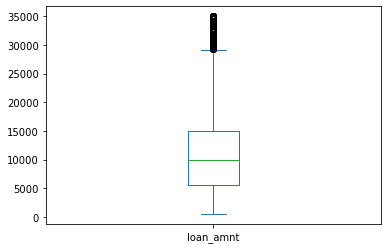

In [47]:
df['loan_amnt'].plot.box()

In [48]:
#almost all our observation are in range of 30k to 35k

In [49]:
#int_rate
df["int_rate"].value_counts()
# based on this distribution we can say multiple borrowers have applied for the same amount.
# And most request amount is 10.99
# This is a suitable candidate for bivariate analysis.

11    4947
13    4667
10    3314
8     3275
12    3180
7     3149
14    2839
16    2617
15    2539
9     1484
17    1482
6     1442
18    1163
19     861
5      524
20     486
21     351
22     187
23      49
24      28
25       1
Name: int_rate, dtype: int64

In [50]:
df["int_rate"].median()
# Total unique interest rate applied for loan by LC are 371 and median intereset rate is approx 12.0

12.0

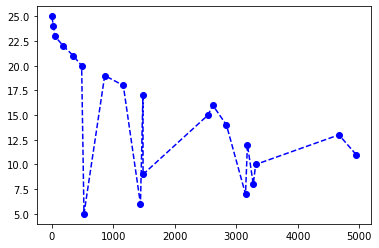

In [51]:
# plot the line graph 

plt.plot(list(df["int_rate"].value_counts()),
       list(df["int_rate"].value_counts().index),'--bo')

# There is a outlier with very high interest rate(25%)
# Most of the interest rate lies 12% median
# This is a suitable candidate for bivariate analysis.

In [52]:
#grade
df["grade"].value_counts()
#based on this distribution we can say most of the borrowers fall into B grade

B    11682
A     9694
C     7913
D     5176
E     2783
F     1024
G      313
Name: grade, dtype: int64

In [53]:
df["grade"].nunique()
# Total unique grades by LC are 7

7

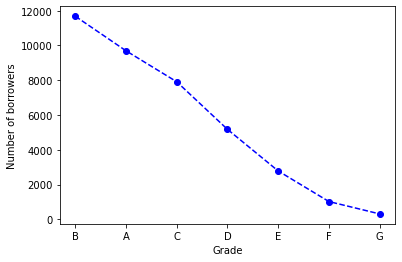

In [54]:
# plot the line graph 
plt.xlabel("Grade")
plt.ylabel("Number of borrowers")
plt.plot(list(df["grade"].value_counts().index),
       list(df["grade"].value_counts()),'--bo')

# The graphs seems very linear, so we can say that there are very less or no outliers


In [55]:
# verification_status
df["verification_status"].value_counts()
# We can infer that about 16000 who applied for loan are not verified and may be defaulters. 

Not Verified       16466
Verified           12343
Source Verified     9776
Name: verification_status, dtype: int64

<BarContainer object of 3 artists>

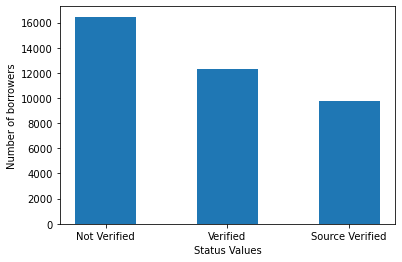

In [56]:
# plot the bar graph 
plt.xlabel("Status Values")
plt.ylabel("Number of borrowers")
plt.bar(list(df["verification_status"].value_counts().index),
       list(df["verification_status"].value_counts()),width=0.5) 

# Approximately 42% of the borrowers are not verified.
# This is a suitable candidate for bivariate analysis.

In [57]:
#loan_status
df["loan_status"].value_counts()

# We can infer that about 32104 who applied for loan have fully paid them whereas 5383 are defaulters

Fully Paid     32104
Charged Off     5383
Current         1098
Name: loan_status, dtype: int64

<BarContainer object of 3 artists>

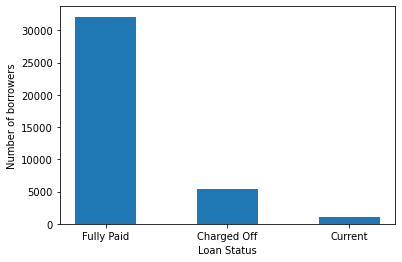

In [58]:
# plot the bar graph 
plt.xlabel("Loan Status")
plt.ylabel("Number of borrowers")
plt.bar(list(df["loan_status"].value_counts().index),
       list(df["loan_status"].value_counts()),width=0.5) 

# % of Fully paid borrowers amounts to 83% approx.
# % of charged off borrowers is 14% approx.
# This is a suitable candidate for bivariate analysis.

In [59]:
#total_accounts

df["total_acc"].value_counts()
# We can infer that the 1436 people are having 16 total accounts whereas as many as 76 accounts are held by a single person/entity

16    1436
15    1422
17    1412
14    1406
20    1399
      ... 
78       1
72       1
87       1
77       1
76       1
Name: total_acc, Length: 82, dtype: int64

In [60]:
df["total_acc"].median()
# Median of total accounts is 20

20.0

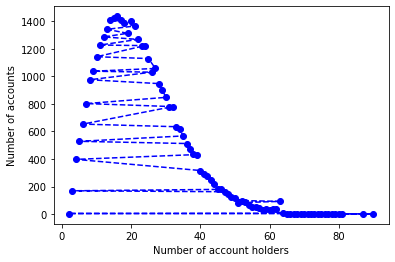

In [61]:
# plot the line graph 
plt.xlabel("Number of account holders")
plt.ylabel("Number of accounts")
plt.plot(list(df["total_acc"].value_counts().index),list(df["total_acc"].value_counts()),'--bo') 

#  We can safely say that 60+ accounts can be treated a outliers.
#  Also, from the graph we can see that median lies around 20.
# This is a suitable candidate for bivariate analysis.

In [62]:
#pub_rec

df["pub_rec"].value_counts()
# We can infer that most of the people/entity have 0 derogatory public records

0    36594
1     1933
2       49
3        7
4        2
Name: pub_rec, dtype: int64

In [63]:
df["pub_rec"].median()
# Median of derogatory public records is 0

0.0

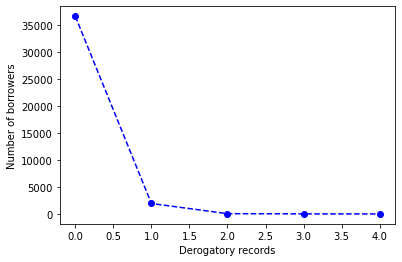

In [64]:
# plot the line graph 
plt.xlabel("Derogatory records")
plt.ylabel("Number of borrowers")
plt.plot(list(df["pub_rec"].value_counts().index),
       list(df["pub_rec"].value_counts()),'--bo')

# Based on this graph distribution, around 95% of the people have no derogatory public records, hence it is not much
# of use for bivariate analysis and we can safely discard this.


# Bivariant analysis

In [65]:
# According to our use case we can simply decide what is the deciding factor to give a loan is depends on this column 
# "loan_status" so we will take it as our target variable and do our analysis with respect to this

In [66]:
# After doing univariant analysis we have noticed some points and we have come up with some hypothesis based on that 
# we can do our analysis on below points

# borrower with high "loan_amnt" might be a trouble
# less "term" for repayment might be risky, hence reject loan
# high "int_rate" might be burden for many borrowers
# the longer "emp_length" history is directly propotional to loan approval(fully paid)
# borrower with higher "annual_inc" might have more chances of getting their loans approved.
# "verification_status" borrower will get approved fast
# "total_acc" ....

In [67]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt'],
      dtype='object')

In [68]:
# loan_amnt

In [69]:
bins = np.linspace(df.loan_amnt.min(), df.loan_amnt.max(),12)

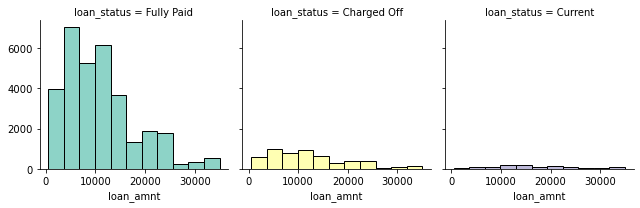

In [70]:
graph = sns.FacetGrid(df, col="loan_status", hue="loan_status", palette="Set3")
graph.map(plt.hist, 'loan_amnt', bins=bins, ec="k")

In [71]:
# from above visualization we can say that
# most requested loan amount was in between 5k to 15k and has been paid fully 
# but the charged off status is in the same range, so it becomes high risk and high reward

In [72]:
# term

<AxesSubplot:xlabel='term', ylabel='count'>

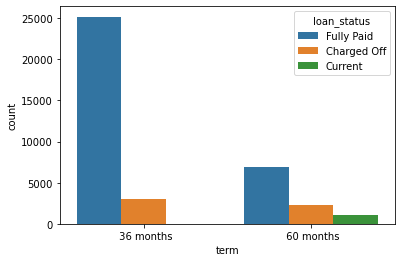

In [73]:
sns.countplot(x="term", hue='loan_status', data=df)

In [74]:
# there are only two term rates present and clearly we can noticed highly requested term is 36 months and 
# has been fully paid also

In [75]:
# int_rate

In [76]:
bins = np.linspace(df["int_rate"].min(),
                   df["int_rate"].max(),6)

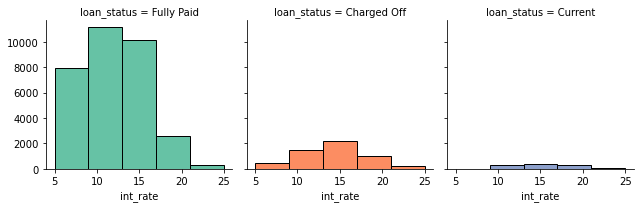

In [77]:
graph = sns.FacetGrid(df, col="loan_status", hue="loan_status", palette="Set2")
graph.map(plt.hist, 'int_rate', bins=bins, ec="k")

In [78]:
# most borrower who are unable to pay loan haev intrest rate of approx 15%
# and we noticed that lower intrest rate allows borrower to fully pay there loan

In [79]:
# emp_length

<AxesSubplot:xlabel='emp_length', ylabel='count'>

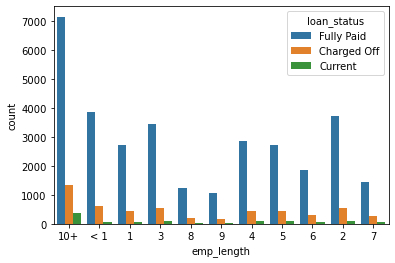

In [80]:
sns.countplot(x="emp_length", hue='loan_status', data=df)

In [81]:
# top insight is emp with 10+ exp are more reliable and pay there loan in full
# our hyphothesis seems valid less emp lenght is more risky. While 10+ haev same amount of charged off status - might indicate
# more variables are in play here to affect the thesis

In [82]:
# annual_inc 

In [83]:
df.annual_inc=df.annual_inc.astype("int").apply(lambda x: round(x))

In [84]:
bins = np.round(np.linspace(df.annual_inc.min(), 100000,5)).astype(int)
bins

array([  4000,  28000,  52000,  76000, 100000])

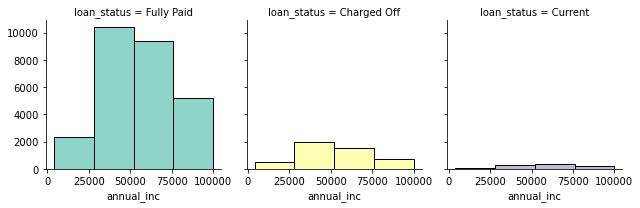

In [85]:
graph = sns.FacetGrid(df, col="loan_status", hue="loan_status", palette="Set3")
graph.map(plt.hist, 'annual_inc', bins=bins, ec="k")

In [86]:
# for this all three graphs seems in normal distribution hence doesnt contribute much to our hyphothesis

In [87]:
# verification_status

<AxesSubplot:xlabel='verification_status', ylabel='count'>

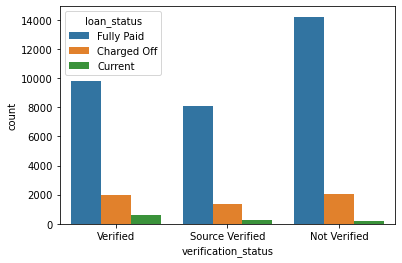

In [88]:
sns.countplot(x="verification_status", hue='loan_status', data=df)

In [89]:
# from the following visualization we can say emp verification status wont impact the load fully paid status, hyphothesis is wrong here 

In [90]:
# total_acc

In [91]:
bins = np.round(np.linspace(df.total_acc.min(), df.total_acc.max(),10)).astype(int)
bins

array([ 2, 12, 22, 31, 41, 51, 61, 70, 80, 90])

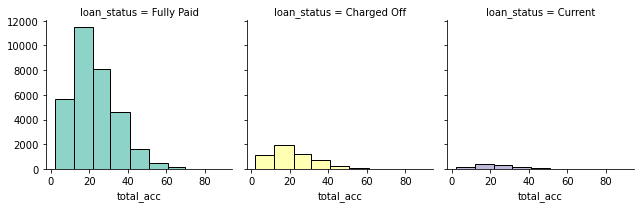

In [92]:
graph = sns.FacetGrid(df, col="loan_status", hue="loan_status", palette="Set3")
graph.map(plt.hist, 'total_acc', bins=bins, ec="k")

In [93]:
# we may notice that emp with total_acc approx 10 to 20 have high repayment status.

# correlation

In [94]:
# lets do the correlation only on the important columns which we got from univariant and bivariant

In [95]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt'],
      dtype='object')

In [96]:
# drop which are not neededd
df1= df.drop(['member_id',  'funded_amnt', 
       'installment', 'grade', 'sub_grade', 'emp_title', 
       'home_ownership',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt'],axis=1)

In [97]:
df1.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'verification_status', 'loan_status', 'total_acc'],
      dtype='object')

In [98]:
correlation_mat = df1.corr()

In [99]:
correlation_mat

,loan_amnt,int_rate,annual_inc,total_acc
loan_amnt,1.000000,0.308778,0.268389,0.254890
int_rate,0.308778,1.000000,0.051023,-0.041159
annual_inc,0.268389,0.051023,1.000000,0.234477
total_acc,0.254890,-0.041159,0.234477,1.000000


<AxesSubplot:>

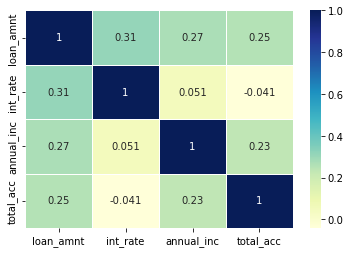

In [100]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

In [101]:
# from above heat map we can say int_rate is correlated to loan_amnt